# Модели распространения в канале

## Выполнил: Шаповал Н.О.

In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from scipy import signal
from scipy.signal import kaiserord, lfilter, firwin, freqz
from scipy import fftpack

## 2.3.1 Задание по разделу модели потерь распространения
### 1. Получить график потерь распространения при частоте f = 900 МГц, высоте базовой станции Hbs= 30 м, высоте антенны мобильного Hms= 2м.

In [ ]:
r = np.arange(1, 20, 1)
#r =6;
hbc=30

hma=2

f1 =900

C=3

In [9]:
#поправочный коэффициент
def koef_hata(f1, hma):
    return (1.11 * np.log10(f1) - 0.7) * hma - (1.56 * np.log10(f1) -0.8)


In [10]:
# Модель Cost-Hata
def Lcoh_f(f1, hbc, r, C, a1):
    return 46.3 + 33.9 * np.log10(f1) - 13.82 * np.log10(hbc) - a1 +(44.9 -6.55 * np.log10(hbc)) * np.log10(r) + C


In [11]:
# Модель Okumura-Hata
def Lokh_f(f1, hbc, r, a1):
    return 69.55+26.16 * np.log10(f1) -13.83 * np.log10( hbc ) + (44.9 -6.55* np.log10( hbc ) ) *np.log10(r) - a1


In [12]:
a1 = koef_hata(f1, hma)
Lcoh = Lcoh_f(f1, hbc, r, C, a1)
Lkoh_f = Lokh_f(f1, hbc, r, a1)

In [45]:
def plot_model(r, Lcoh, Lokh):
    plt.plot( r , Lcoh , "r" , r , Lokh , 'g')
    plt.title("Потери распространения ")
    plt.xlabel(' Расстояние , км ')
    plt.ylabel(' Потери распространения , дБ ' )
    plt.legend([ ' Cost-Hata ' , ' Okumura-Hata ' ] )

def plot_model_2(r, Lcoh, Lokh, r2, Lcoh2, Lokh2):
    plt.plot(r, Lcoh, "r", label="Cost-Hata with Hbs")
    plt.plot(r, Lokh, "g", label="Cost-Hata with Hbs")
    plt.plot(r2, Lcoh2, "r--", label="Okumura-Hata with Hbs2")
    plt.plot(r2, Lokh2, "g--", label="Okumura-Hata with Hbs2")
    plt.title("Потери распространения ")
    plt.xlabel(' Расстояние , км ')
    plt.ylabel(' Потери распространения , дБ ' )
    plt.legend()

In [34]:
# plot_model(r, Lcoh, Lokh)

In [14]:
Pt = 35 # мощность передатчика , дБм
Gt = 8
Gr = 3
Pr = Pt + Gt + Gr - Lcoh


In [63]:
def plot_p(r, Pr):
    plt.figure( 2 )
    plt.plot(r , Pr)
    plt.title("Принятая мощность" )
    plt.xlabel(' Расстояние , км ' )
    plt.ylabel(' Мощность на входе приемника ')


def plot_p_2(r, Pr, r2, Pr2):
    plt.figure( 2 )
    plt.plot(r, Pr, "r", label="Pr")
    
    plt.plot(r2, Pr2, "b", label="Pr2")

    plt.title("Принятая мощность" )
    plt.xlabel(' Расстояние , км ' )
    plt.ylabel(' Мощность на входе приемника ')
    plt.legend()
    plt.show()




In [33]:
# plot_p(r, Pr)

In [34]:
def model_loth(r, hma, hbc, C, f1):
    a1 = koef_hata(f1, hma)
    Lcoh = Lcoh_f(f1, hbc, r, C, a1)
    Lkoh = Lokh_f(f1, hbc, r, a1)

    plot_model(r, Lcoh, Lkoh)
    Pt = 35 # мощность передатчика , дБм
    Gt = 8
    Gr = 3
    Pr = Pt + Gt + Gr - Lcoh
    plot_p(r, Pr)

def model_loth_2(r, hma, hbc, C, f1, r2, hma2, hbc2, C2, f2):
    a1 = koef_hata(f1, hma)
    Lcoh = Lcoh_f(f1, hbc, r, C, a1)
    Lkoh = Lokh_f(f1, hbc, r, a1)


    a2 = koef_hata(f2, hma2)
    Lcoh2 = Lcoh_f(f2, hbc2, r2, C2, a2)
    Lkoh2 = Lokh_f(f2, hbc2, r2, a2)
    
    plot_model_2(r, Lcoh, Lkoh, r2, Lcoh2, Lkoh2)
    Pt = 35 # мощность передатчика , дБм
    Gt = 8
    Gr = 3
    
    Pr = Pt + Gt + Gr - Lcoh
    Pr2 = Pt + Gt + Gr - Lcoh2
    
    plot_p_2(r, Pr, r2, Pr2)

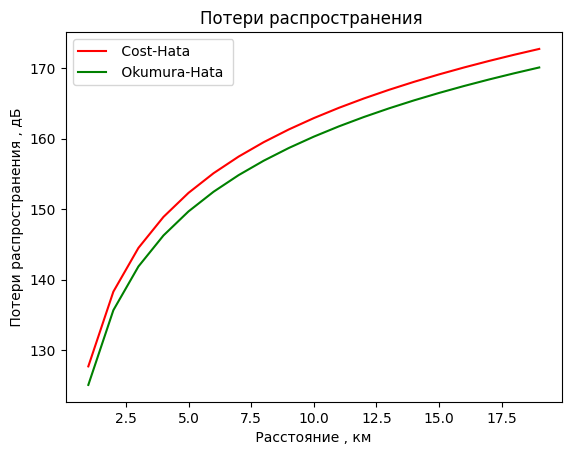

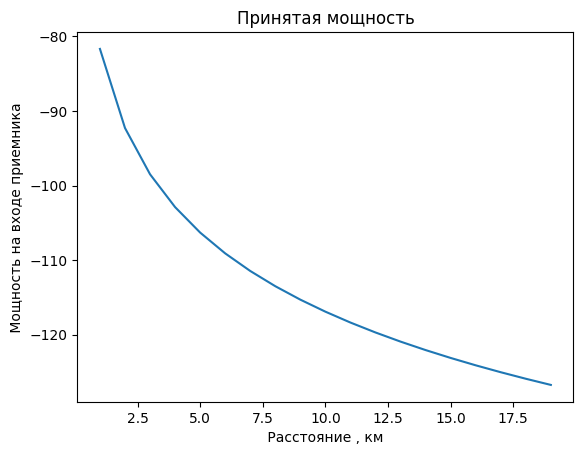

In [50]:
model_loth(r, hma, hbc, C, f1)

### 2.Получить график потерь распространения при частоте f1 = 900 Гц, высоте базовой станции Hbs1= 20 м, высоте базовой станции 2 Hbs2= 50 м, высоте мобильного Hms= 2 м.

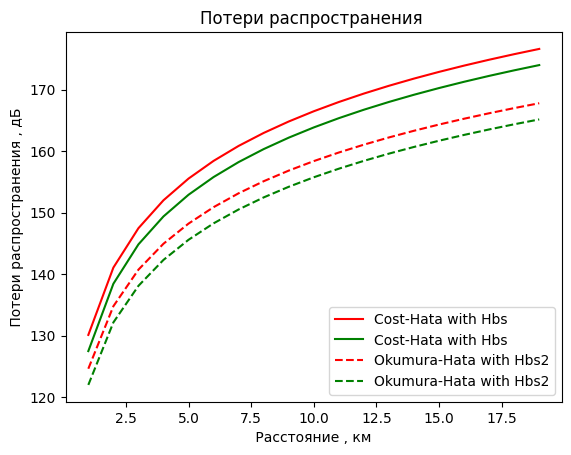

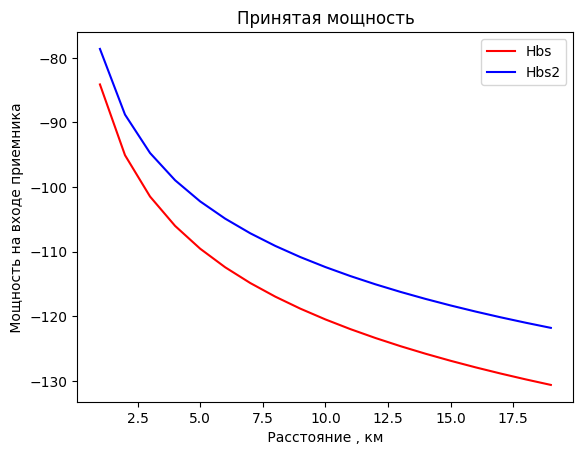

In [46]:
Hbs1 = 20
Hbs2 = 50
Hms = 2
model_loth_2(r, Hms, Hbs1, C, f1, r, Hms, Hbs2, C, f1)

## 3. Получить график потерь распространения при частоте f1 =1800 Гц, высоте базовой станции Hbs1= 20 м, высоте базовой станции 2 Hbs2= 50 м, высоте мобильного Hms= 2 м.

In [47]:
f1 = 1800
Hbs1 = 20
Hbs2 = 50
Hms = 2

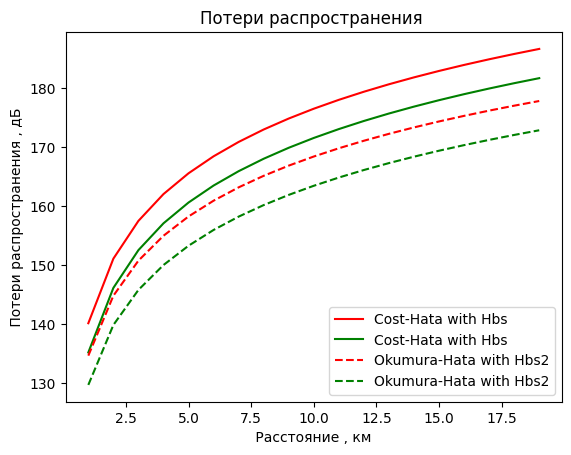

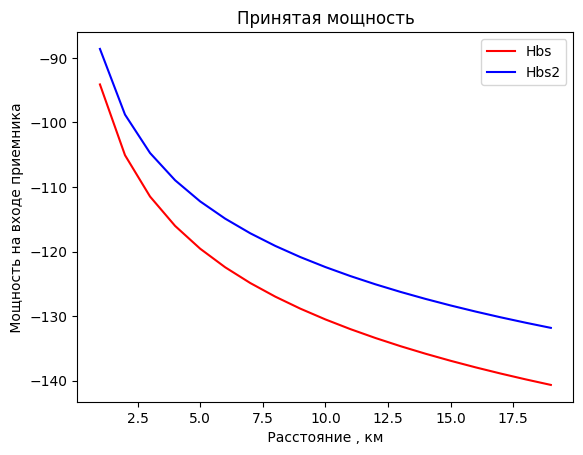

In [48]:
model_loth_2(r, Hms, Hbs1, C, f1, r, Hms, Hbs2, C, f1)

## 4. Получить график принимаемой мощности при мощности передатчика 10 Вт, 20 Вт. Линейную мощность переведите в логарифмический масштаб.

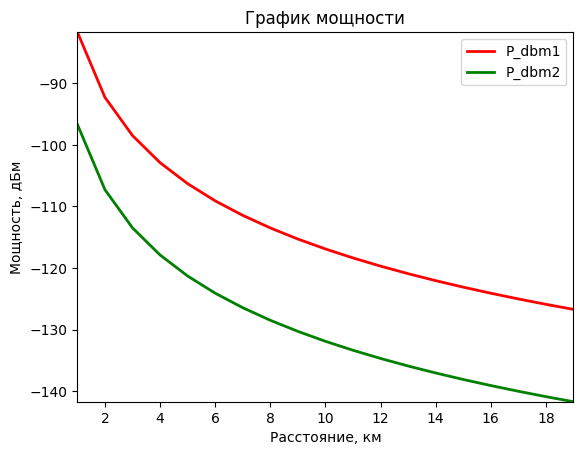

[ -81.68520527  -92.28894346  -98.49173266 -102.89268164 -106.30632287
 -109.09547084 -111.45366185 -113.49641982 -115.29826005 -116.91006106
 -118.36811242 -119.69920903 -120.92369921 -122.05740004 -123.11285026
 -124.10015801 -125.02759108 -125.90199823 -126.72911645]


In [71]:
r = np.arange(1, 20, 1)
#r =6;
hbc = 30

hma = 2

f1 = 900

C = 3


a1 = koef_hata(f1, hma)
Lcoh = Lcoh_f(f1, hbc, r, C, a1)
Lkoh_f = Lokh_f(f1, hbc, r, a1)


Pt1 = 10 # мощность передатчика , дБм
Gt = 8
Gr = 3
Pr = Pt + Gt + Gr - Lcoh


Pt2 = 20
Pr2 = Pt2 + Gt + Gr - Lcoh


plot_p_2(r, Pr, r, Pr2)





# защита от нулевых и отрицательных значений
# Pr_safe = np.where(Pr > 0, Pr, np.nan)
# Pr2_safe = np.where(Pr2 > 0, Pr2, np.nan)

# with np.errstate(divide='ignore', invalid='ignore'):
#     P_dbm = 10 * np.log10(Pr_safe / 1e-3)
#     P_dbm2 = 10 * np.log10(Pr2_safe / 1e-3)

# def plot_p_3(x1, y1, x2, y2):
#     plt.plot(x1, y1, 'r-', label='P_dbm1')
#     plt.plot(x2, y2, 'g-', label='P_dbm2')
#     plt.xlabel('Расстояние, км')
#     plt.ylabel('Мощность, дБм')
#     plt.title('График мощности')
#     plt.xlim(min(x1.min(), x2.min()), max(x1.max(), x2.max()))
#     y_all = np.concatenate((y1, y2))
#     finite_vals = y_all[np.isfinite(y_all)]
#     if finite_vals.size > 0:
#         plt.ylim(np.min(finite_vals), np.max(finite_vals))
#     else:
#         print("Нет конечных значений для оси Y")
#     plt.legend()
#     plt.show()



# plot_p_3(r, P_dbm, r, P_dbm2)
# print(P_dbm)

print(Pr)


